<a href="https://colab.research.google.com/github/alokranjan04/FileSaver.js/blob/master/KNN_SVHN_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KNN on SVHN

#### Import the data from drive

In [0]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.seterr(over='ignore')
import os
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import h5py
import numpy as np
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="8"

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/DLCP/Project-1/data/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

x_train = x_train.reshape(x_train.shape[0], 1024)
x_test = x_test.reshape(x_test.shape[0], 1024)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

('Training set', (42000, 1024), (42000,))
('Test set', (18000, 1024), (18000,))


In [5]:
print(x_train.shape)
print(y_train.shape)

(42000, 1024)
(42000,)


In [6]:
print(x_test.shape)
print(y_test.shape)

(18000, 1024)
(18000,)


### Visualizing the first 10 images in the dataset and their labels

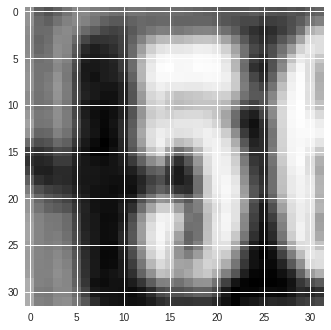

y value 5
predicted value for traing data set5


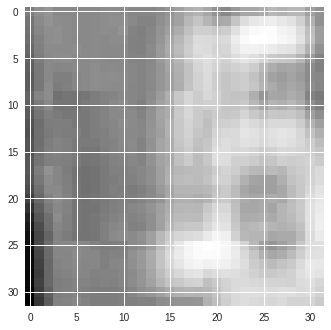

y value 4
predicted value for traing data set4


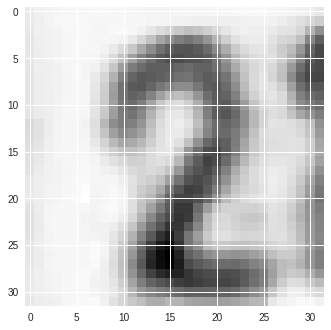

y value 2
predicted value for traing data set2


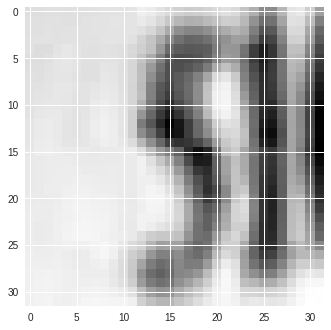

y value 5
predicted value for traing data set5


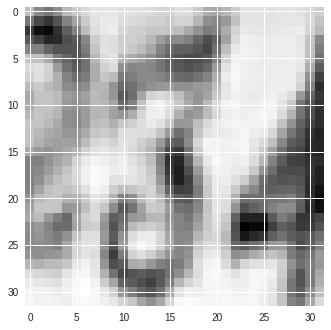

y value 3
predicted value for traing data set3


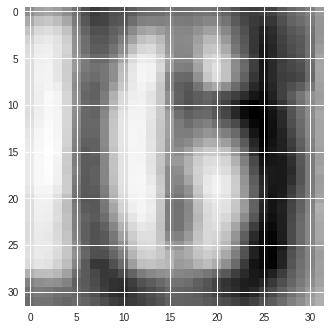

y value 6
predicted value for traing data set6


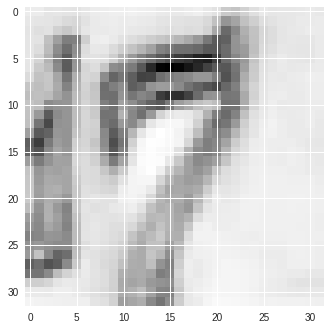

y value 7
predicted value for traing data set7


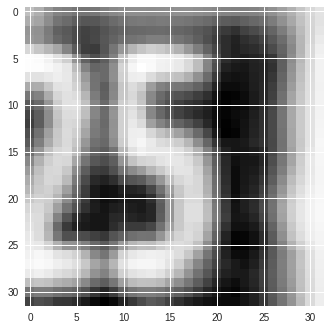

y value 5
predicted value for traing data set5


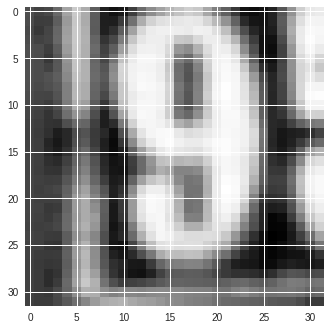

y value 9
predicted value for traing data set9


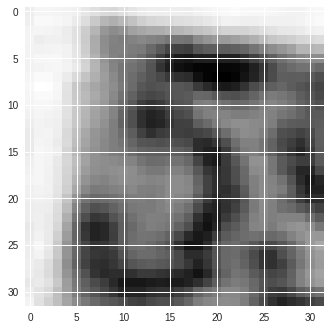

y value 5
predicted value for traing data set5


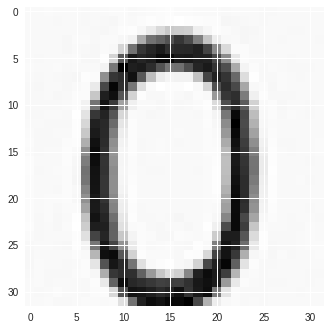

y value 0
predicted value for traing data set0


In [91]:

for i in range(125,136):
  a = np.reshape(x_train[i],[32,32])
  a.shape
  plt.imshow(a, cmap='Greys_r')
  plt.show()
  print("y value "+str(y_train[i]))
  print("predicted value for traing data set"+ str(cl1.predict(x_train[i])))


### Build KNN and predict the outputs for any 2 images from the test data.

In [0]:
class NN:
    def __init__(self):
        pass
    
    # Memorize the training data    
    def train(self, X, y):
        # X is 2D if size N x D = 28x28, so each row is an example
        # y is 1D of size N
        self.tr_x = X
        self.tr_y = y
        
    # For the test image:
    #  find nearest train image with minimum distance from the test image
    #  predict the label of nearest training image
    def predict(self, x):
        # x is of size D = 28x28 for which we want to predict the label
        # returns the predicted label for the input x
        min_idx = None
        min_dist = 100000000
        arr = []
        for test_sample in range(len(self.tr_x)):
            dist = 0
            for each_value in range(len(self.tr_x[0])):
                dist += abs(float((self.tr_x[test_sample][each_value] - x[each_value])))
            if dist < min_dist:
                min_dist = dist
                min_idx = test_sample
                arr.append(min_idx)
        #return self.tr_y[arr[0]] , self.tr_y[arr[1]]
        return (self.tr_y[min_idx])

In [0]:
cl1 = NN()

In [0]:
cl1.train(x_train, y_train)

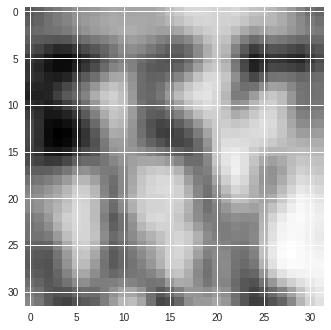

y value5
3


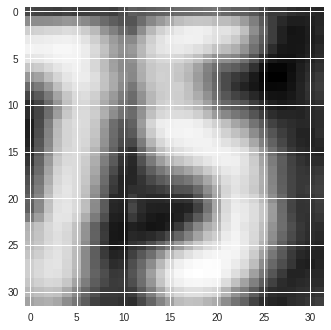

y value5
5


In [86]:
tdata = x_test[62]
a = np.reshape(tdata,[32,32])
a.shape
plt.imshow(a, cmap='Greys_r')
plt.show()

print('y value'+str(y_test[62]))
print(cl1.predict(tdata))


tdata = x_test[19]
a = np.reshape(tdata,[32,32])
a.shape
plt.imshow(a, cmap='Greys_r')
plt.show()

print('y value'+str(y_test[19]))
print(cl1.predict(tdata))
